C:\Users\bgpa4\AppData\Local\Temp\ipykernel_2080\3818931775.py:78: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


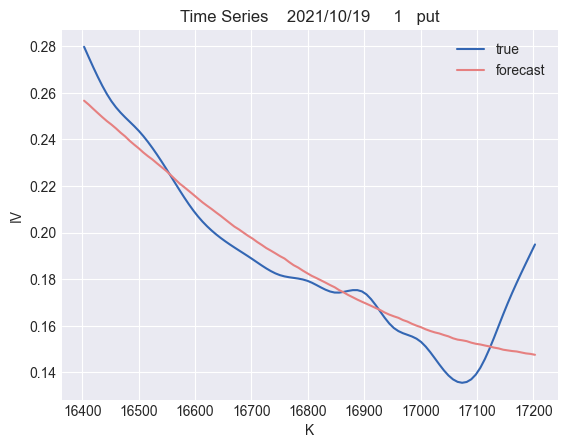

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_2080\3818931775.py:78: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


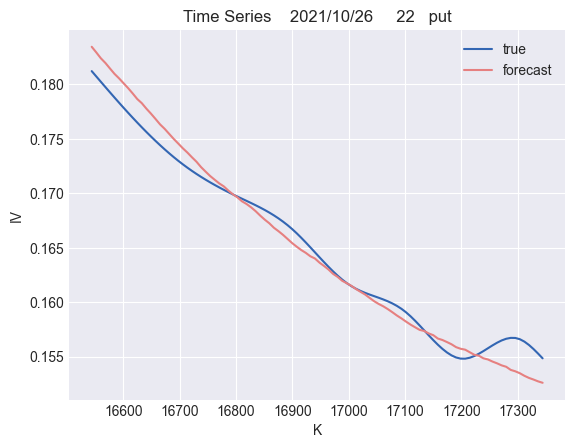

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_2080\3818931775.py:78: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


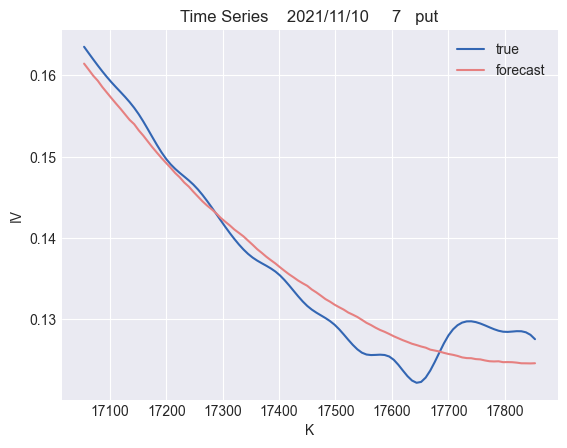

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_2080\3818931775.py:78: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


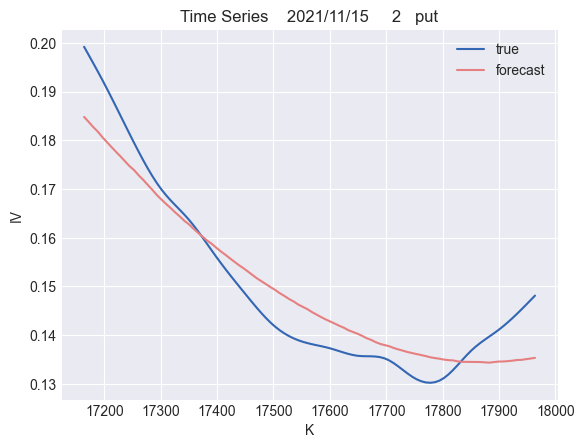

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


s_c = '結算價'
model_path = './../../../'
expiry = 'NearbyMonth'

type_ = 'put'
IV_type = '{}IV'.format(type_)
if type_ == 'call':
    K_Range = [300, 500]
if type_ == 'put':
    K_Range = [500, 300]
K_Range_file = '{}_{}.csv'.format(K_Range[0], K_Range[1])
K_Range_dir = '{}_{}'.format(K_Range[0], K_Range[1])

model_type = 'LSTM-LSTM'
#model_type = 'TimeLinear'
#model_type = 'ANN'
#model_type = 'CNN-LSTM'
seq_length1 = 7
seq_length2 = seq_length1 + 1
min_contract_day = 2
forecast_variable = 'slope'
#forecast_variable = 'iv'
model_name = 'model1'

model_Dir_tree = ['Forecast&model', expiry, IV_type, 'K_{}'.format(K_Range_dir), model_type,\
                  'seq{}_seq{}_min{}'.format(seq_length1, seq_length2, min_contract_day), forecast_variable]
for model_dir in model_Dir_tree:
    if model_dir not in os.listdir(model_path):
        os.mkdir(model_path + model_dir)
    model_path = model_path + model_dir + '/'

file_path = model_path + 'model1.csv'
IV_data = pd.read_csv(file_path, index_col=False, encoding='Big5')


IV_matrix = np.array(IV_data)
#put_matrix = np.array(IV_put)
index_expiry = IV_data.columns.get_loc('到期天數')
#match = np.logical_or((IV_matrix[:, index_expiry] ==5), (IV_matrix[:, index_expiry] ==9))
#match = IV_matrix[:, index_expiry] == 15

s_c = '結算價'
#IV_matrix = IV_matrix[match]

columns_names = ['履約價', '隱含波動率({})'.format(s_c),'預測隱含波動率({})'.format(s_c), '期貨{}'.format(s_c)]
#columns_names = ['履約價(收盤價)', '隱含波動率(收盤價)','預測隱含波動率(價)']
column_index = [IV_data.columns.get_loc(col) for col in columns_names]

dates = np.unique(IV_matrix[:,0])


#dates = ['2021/10/19', '2021/11/03', '2021/11/11', '2021/11/22', '2021/12/10', '2022/08/15']

dates = ['2021/10/19', '2021/10/26', '2021/11/10', '2021/11/15']
high_color =  '#d62728'
low_color = '#2ca02c'



expiry_days = IV_matrix[:, IV_data.columns.get_loc('到期天數')]


color_true = [0.2,0.4,0.7]
color_forcast = [0.9,0.5, 0.5]

F_color = [0.5, 0.2, 0.2]

for date in dates:
    one_day = IV_matrix[IV_matrix[:,0] == date]
    plt.style.use('seaborn-darkgrid')
    plt.plot(one_day[:,column_index[0]], one_day[:,column_index[1]],  \
             c=color_true, label='true')

    y_new = one_day[:,column_index[2]]

    plt.plot(one_day[:,column_index[0]], y_new, label='forecast', c=color_forcast)


    expiry_day = one_day[0, IV_data.columns.get_loc('到期天數')]

    F = one_day[:2, column_index[3]]
    iv_min = np.min(np.hstack((one_day[:,column_index[1]], one_day[:,column_index[1]], \
                               y_new)))
    iv_max = np.max(np.hstack((one_day[:,column_index[1]], one_day[:,column_index[1]], \
                               y_new)))

    #plt.plot(F, [iv_min, iv_max], ls='--', c=F_color)
    plt.xlabel('K')
    plt.ylabel('IV')
    #plt.title('{}    {}     {}   {}'.format(model_type, date, expiry_day, type_))    
    plt.title('{}    {}     {}   {}'.format('Time Series', date, expiry_day, type_))  
    plt.legend()
    plt.show()

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_2080\2190321631.py:121: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


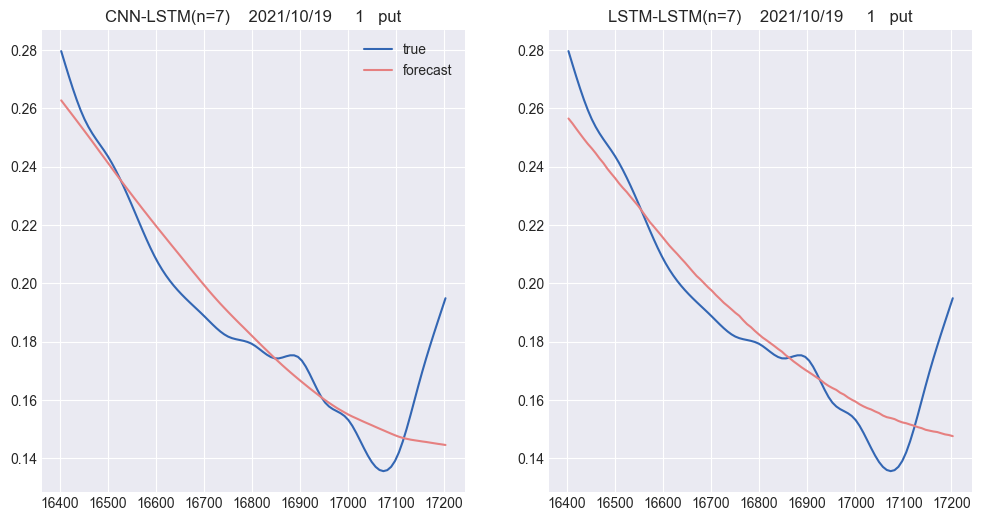

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_2080\2190321631.py:121: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


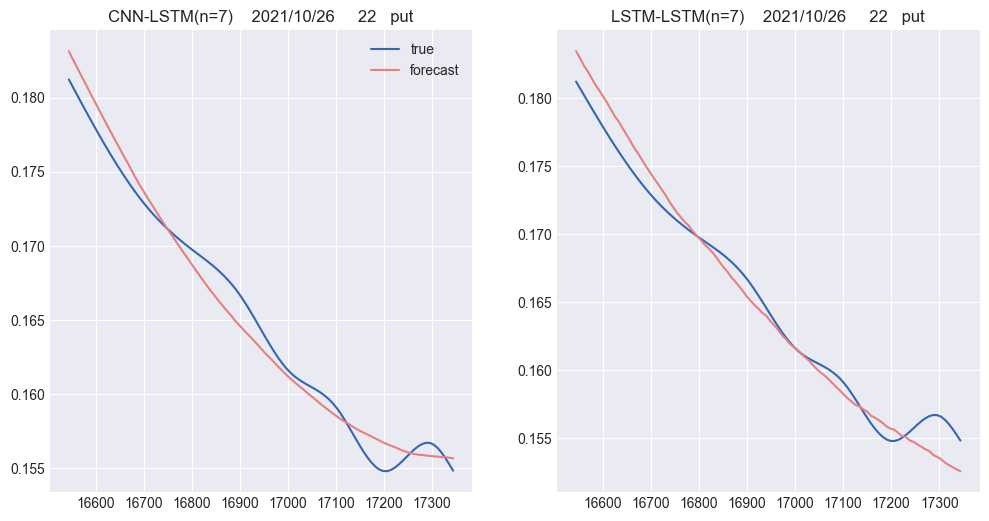

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_2080\2190321631.py:121: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


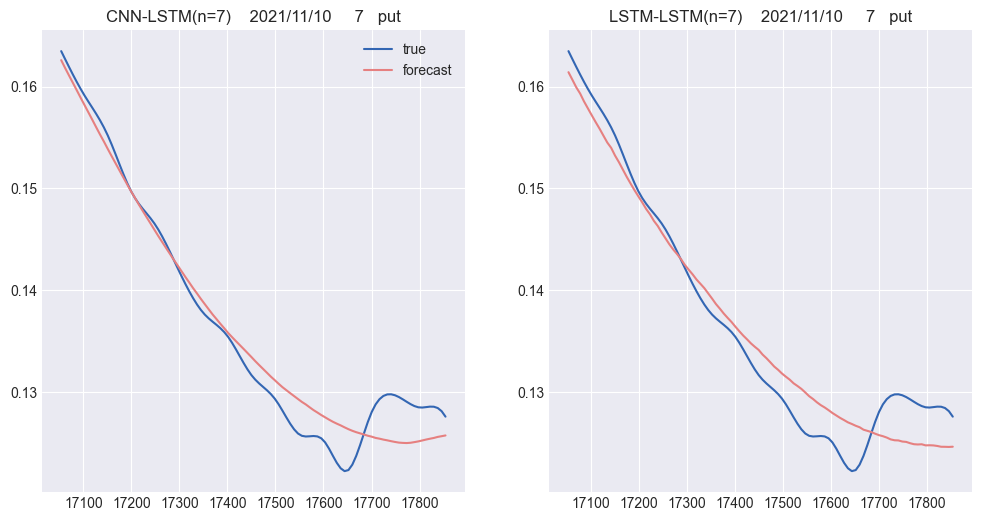

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_2080\2190321631.py:121: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


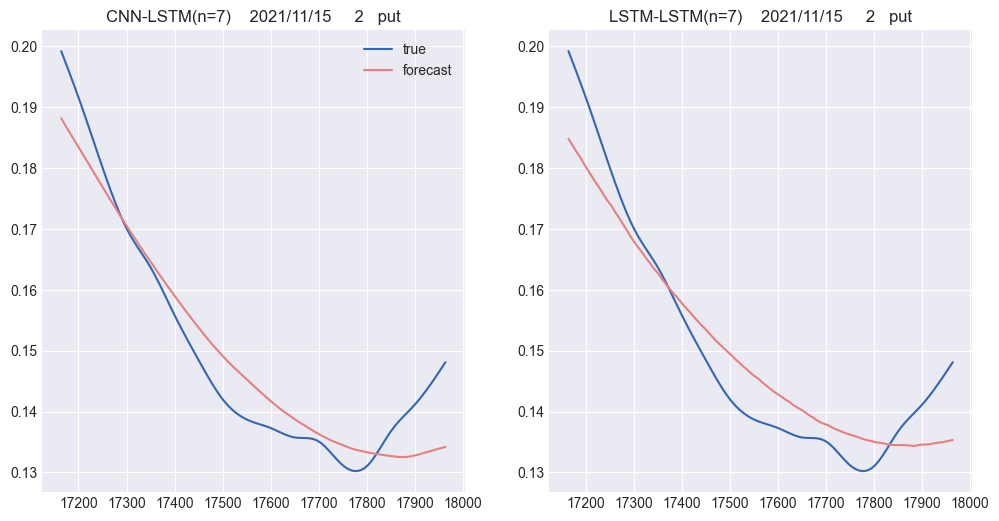

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


s_c = '結算價'
model_path = './../../../'
expiry = 'NearbyMonth'

type_ = 'put'
IV_type = '{}IV'.format(type_)
if type_ == 'call':
    K_Range = [300, 500]
if type_ == 'put':
    K_Range = [500, 300]
K_Range_file = '{}_{}.csv'.format(K_Range[0], K_Range[1])
K_Range_dir = '{}_{}'.format(K_Range[0], K_Range[1])

#model_type = 'LSTM-LSTM'
#model_type = 'TimeLinear'
#model_type = 'ANN'
model_type1 = 'CNN-LSTM'
seq_length1_1 = 7
seq_length2_1 = seq_length1_1 + 1
min_contract_day = 2
forecast_variable = 'slope'
#forecast_variable = 'iv'
model_name = 'model1'

model_Dir_tree = ['Forecast&model', expiry, IV_type, 'K_{}'.format(K_Range_dir), model_type1,\
                  'seq{}_seq{}_min{}'.format(seq_length1_1, seq_length2_1, min_contract_day), forecast_variable]
for model_dir in model_Dir_tree:
    if model_dir not in os.listdir(model_path):
        os.mkdir(model_path + model_dir)
    model_path = model_path + model_dir + '/'

file_path = model_path + 'model1.csv'
IV_data1 = pd.read_csv(file_path, index_col=False, encoding='Big5')


IV_matrix1 = np.array(IV_data1)

index_expiry = IV_data.columns.get_loc('到期天數')

model_path = './../../../'
model_type2 = 'LSTM-LSTM'
#model_type2 = 'TimeLinear'
#model_type = 'ANN'
#model_type = 'CNN-LSTM'
seq_length1_2 = 7
seq_length2_2 = seq_length1_2 + 1
min_contract_day = 2
forecast_variable = 'slope'
#forecast_variable = 'iv'
model_name = 'model1'

model_Dir_tree = ['Forecast&model', expiry, IV_type, 'K_{}'.format(K_Range_dir), model_type2,\
                  'seq{}_seq{}_min{}'.format(seq_length1_2, seq_length2_2, min_contract_day), forecast_variable]
for model_dir in model_Dir_tree:
    if model_dir not in os.listdir(model_path):
        os.mkdir(model_path + model_dir)
    model_path = model_path + model_dir + '/'

file_path = model_path + 'model1.csv'
IV_data2 = pd.read_csv(file_path, index_col=False, encoding='Big5')


IV_matrix2 = np.array(IV_data2)
#put_matrix = np.array(IV_put)
index_expiry = IV_data1.columns.get_loc('到期天數')







columns_names = ['履約價', '隱含波動率({})'.format(s_c),'預測隱含波動率({})'.format(s_c), '期貨{}'.format(s_c)]
column_index = [IV_data.columns.get_loc(col) for col in columns_names]





















#dates = np.unique(IV_matrix1[:,0])


dates = ['2021/10/19', '2021/10/26', '2021/11/10', '2021/11/15']

expiry_days = IV_matrix[:, IV_data.columns.get_loc('到期天數')]


color_true = [0.2,0.4,0.7]
color_forcast = [0.9,0.5, 0.5]

F_color = [0.5, 0.2, 0.2]

for date in dates:
    fig, ax = plt.subplots(1, 2, figsize = (12,6))
    one_day1 = IV_matrix1[IV_matrix1[:,0] == date]
    one_day2 = IV_matrix2[IV_matrix2[:,0] == date]
    plt.style.use('seaborn-darkgrid')
    ax[0].plot(one_day1[:,column_index[0]], one_day1[:,column_index[1]],  \
             c=color_true, label='true')

    y_new1 = one_day1[:,column_index[2]]

    ax[0].plot(one_day1[:,column_index[0]], y_new1, label='forecast', c=color_forcast)

    y_new2 = one_day2[:,column_index[2]]
    ax[1].plot(one_day2[:,column_index[0]], one_day2[:,column_index[1]],  \
             c=color_true, label='true')
    ax[1].plot(one_day2[:,column_index[0]], y_new2, label='forecast', c=color_forcast)

    expiry_day = one_day1[0, IV_data1.columns.get_loc('到期天數')]

    F = one_day[:2, column_index[3]]
    #iv_min = np.min(np.hstack((one_day[:,column_index[1]], one_day[:,column_index[1]], \
                               #y_new)))
    #iv_max = np.max(np.hstack((one_day[:,column_index[1]], one_day[:,column_index[1]], \
                               #y_new)))

    #plt.plot(F, [iv_min, iv_max], ls='--', c=F_color)
    #plt.xlabel('K')
    #plt.ylabel('IV')
    ax[0].set_title('{}    {}     {}   {}'.format('{}(n={})'.format(model_type1, seq_length1_1)\
                                                   , date, expiry_day, type_)) 
    ax[1].set_title('{}    {}     {}   {}'.format('{}(n={})'.format(model_type2, seq_length1_2)\
                                                  , date, expiry_day, type_)) 
    ax[0].legend()
    ax[0].legend()
    plt.show()

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_2080\2147370609.py:78: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


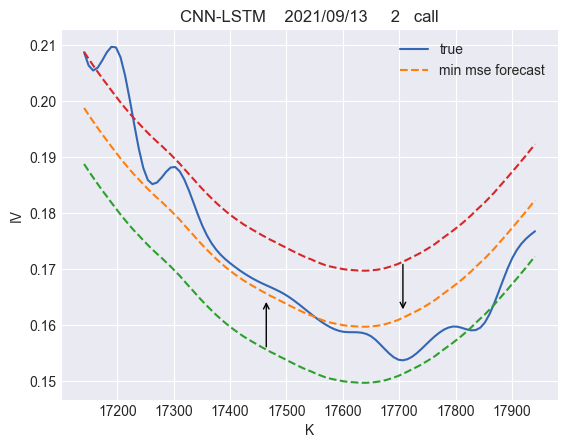

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


s_c = '結算價'
model_path = './../../../'
expiry = 'NearbyMonth'

type_ = 'call'
IV_type = '{}IV'.format(type_)
if type_ == 'call':
    K_Range = [300, 500]
if type_ == 'put':
    K_Range = [500, 300]
K_Range_file = '{}_{}.csv'.format(K_Range[0], K_Range[1])
K_Range_dir = '{}_{}'.format(K_Range[0], K_Range[1])

#model_type = 'LSTM-LSTM'
#model_type = 'TimeLinear'
#model_type = 'ANN'
model_type = 'CNN-LSTM'
seq_length1 = 15
seq_length2 = seq_length1 + 1
min_contract_day = 2
forecast_variable = 'slope'
#forecast_variable = 'iv'
model_name = 'model1'

model_Dir_tree = ['Forecast&model', expiry, IV_type, 'K_{}'.format(K_Range_dir), model_type,\
                  'seq{}_seq{}_min{}'.format(seq_length1, seq_length2, min_contract_day), forecast_variable]
for model_dir in model_Dir_tree:
    if model_dir not in os.listdir(model_path):
        os.mkdir(model_path + model_dir)
    model_path = model_path + model_dir + '/'

file_path = model_path + 'model1.csv'
IV_data = pd.read_csv(file_path, index_col=False, encoding='Big5')


IV_matrix = np.array(IV_data)
#put_matrix = np.array(IV_put)
index_expiry = IV_data.columns.get_loc('到期天數')
#match = np.logical_or((IV_matrix[:, index_expiry] ==5), (IV_matrix[:, index_expiry] ==9))
#match = IV_matrix[:, index_expiry] == 15

s_c = '結算價'
#IV_matrix = IV_matrix[match]

columns_names = ['履約價', '隱含波動率({})'.format(s_c),'預測隱含波動率({})'.format(s_c), '期貨{}'.format(s_c)]
#columns_names = ['履約價(收盤價)', '隱含波動率(收盤價)','預測隱含波動率(價)']
column_index = [IV_data.columns.get_loc(col) for col in columns_names]

dates = np.unique(IV_matrix[:,0])


#dates = ['2021/11/02', '2021/11/11', '2022/02/15']

dates = ['2021/09/13']
high_color =  '#d62728'
low_color = '#2ca02c'



expiry_days = IV_matrix[:, IV_data.columns.get_loc('到期天數')]


color_true = [0.2,0.4,0.7]
color_forcast = [0.9,0.5, 0.5]

F_color = [0.5, 0.2, 0.2]

for date in dates:
    one_day = IV_matrix[IV_matrix[:,0] == date]
    plt.style.use('seaborn-darkgrid')
    plt.plot(one_day[:,column_index[0]], one_day[:,column_index[1]],  \
             c=color_true, label='true')

    y_new = one_day[:,column_index[2]]
    y_new_low = y_new - 0.01
    y_new_high = y_new + 0.01

    #plt.plot(one_day[:,column_index[0]], y_new, label='forecast', c=color_forcast)
    plt.plot(one_day[:,column_index[0]], y_new, ls='--', c='#ff7f0e', label='min mse forecast')
    plt.plot(one_day[:,column_index[0]], y_new_low, ls='--',c=low_color)
    plt.plot(one_day[:,column_index[0]], y_new_high , ls='--',c=high_color)
    arrow_x = one_day[70 ,column_index[0]]
    arrow_y = y_new[70] + 0.001
    plt.gca().annotate('', xy=(arrow_x, arrow_y), xytext=(arrow_x, arrow_y+0.009),
            arrowprops=dict(facecolor=high_color, arrowstyle='->'))
    

    arrow_x = one_day[40 ,column_index[0]]
    arrow_y = y_new[40] - 0.001
    plt.gca().annotate('', xy=(arrow_x, arrow_y), xytext=(arrow_x, arrow_y-0.009),
            arrowprops=dict(facecolor=high_color, arrowstyle='->'))

    expiry_day = one_day[0, IV_data.columns.get_loc('到期天數')]

    F = one_day[:2, column_index[3]]
    iv_min = np.min(np.hstack((one_day[:,column_index[1]], one_day[:,column_index[1]], \
                               y_new)))
    iv_max = np.max(np.hstack((one_day[:,column_index[1]], one_day[:,column_index[1]], \
                               y_new)))

    #plt.plot(F, [iv_min, iv_max], ls='--', c=F_color)
    plt.xlabel('K')
    plt.ylabel('IV')
    plt.title('{}    {}     {}   {}'.format(model_type, date, expiry_day, type_))    
    plt.legend()
    plt.show()
